# Problem Statement

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low.

We will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# EDA (EXPLORATORY DATA ANALYSIS)

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:>

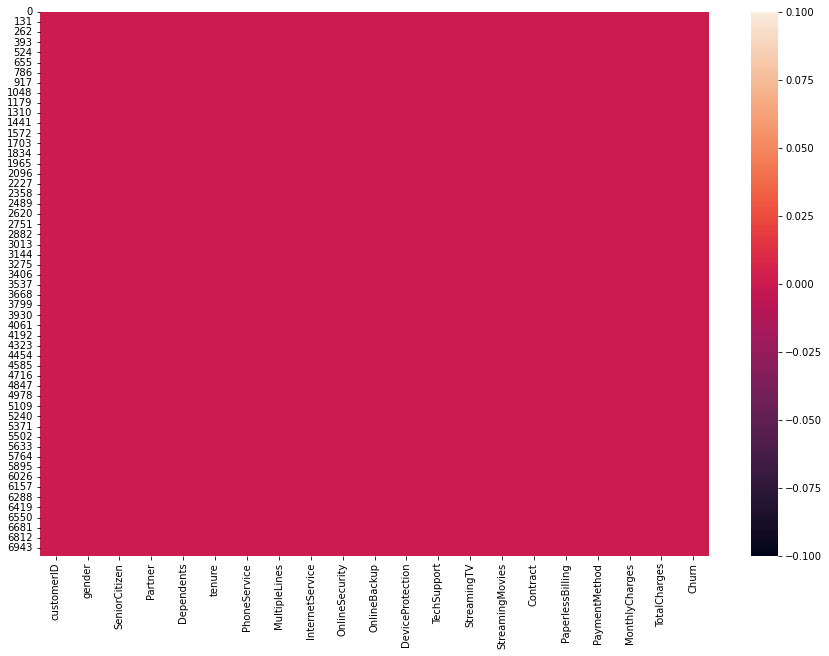

In [8]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())

NO NULL VALUES

In [9]:
df['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

since blank space is present, so replacing it with null values and then replacing null values with mean

In [10]:
df= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv",na_values = ' ')
df


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [11]:
df['TotalCharges'].value_counts()

20.20      11
19.75       9
20.05       8
19.90       8
19.65       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: TotalCharges, Length: 6530, dtype: int64

In [12]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

<AxesSubplot:>

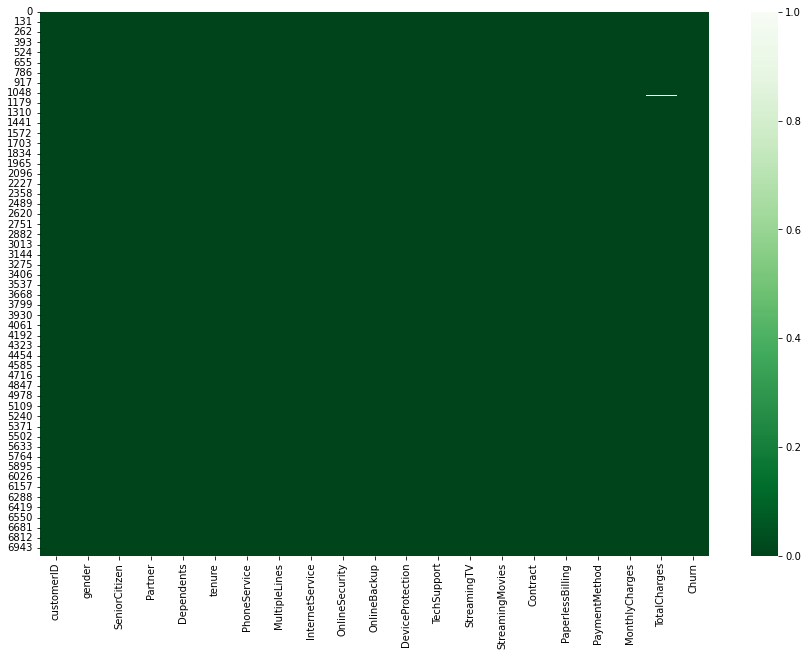

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull(),cmap="Greens_r")

In [14]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

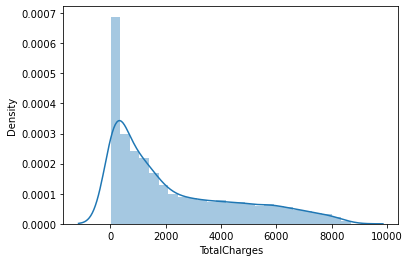

In [15]:
sns.distplot(df['TotalCharges']) #fill nan with mean

In [16]:
df['TotalCharges']=df['TotalCharges'].fillna(np.mean(df['TotalCharges']))

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<AxesSubplot:>

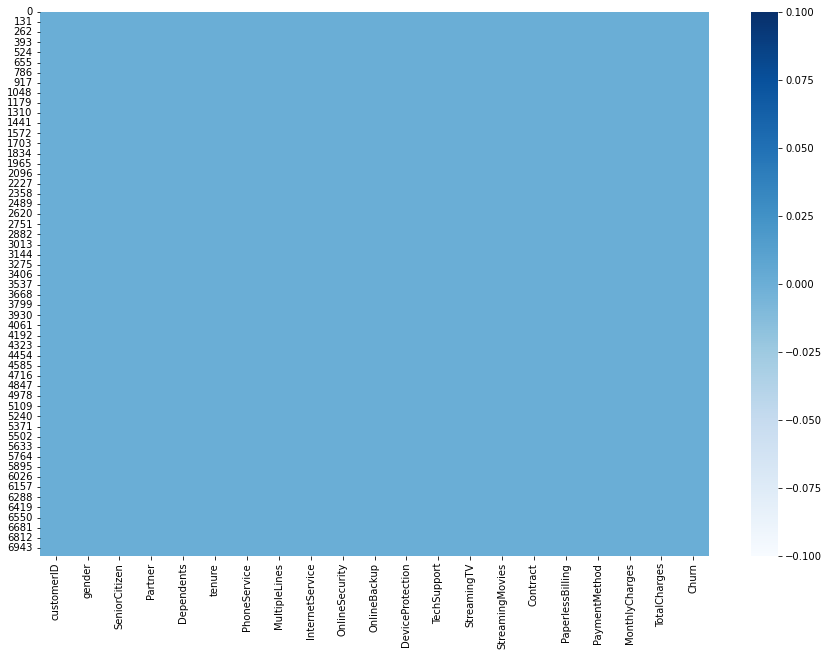

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull(),cmap="Blues")

NOW THE MISSING VALUE IS COMPLETELY REMOVED ,CAN MOVE FORWARD NOW

In [18]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


DATASET SUMMARY

SUMMARY OF THE DATASET LOOKS PERFECTLY FINE AS NO NEGATIVE VALUES.

STD IS ALSO PRESENT IS SOME COLUMN.



2283.300441    11
20.200000      11
19.750000       9
20.050000       8
19.900000       8
               ..
6849.400000     1
692.350000      1
130.150000      1
3211.900000     1
6844.500000     1
Name: TotalCharges, Length: 6531, dtype: int64

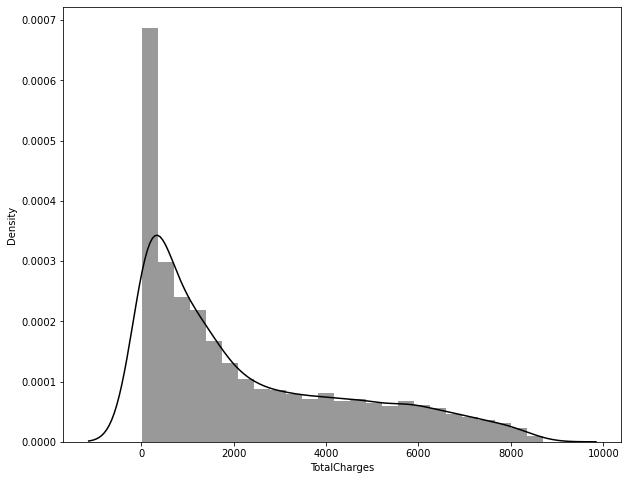

In [19]:
plt.figure(figsize=(10,8))
sns.distplot(df['TotalCharges'],color='k')
df['TotalCharges'].value_counts()

SKEWNESS PRESENT IN DATA

No     4933
Yes    2110
Name: Dependents, dtype: int64

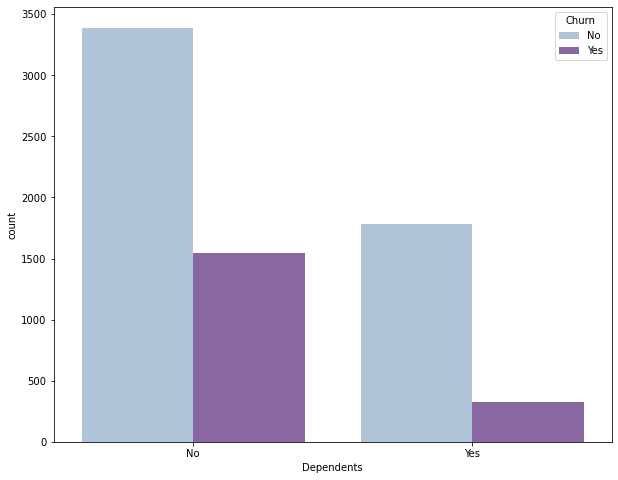

In [20]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='Dependents',palette='BuPu',hue='Churn')
df['Dependents'].value_counts()

MAJORITY WITH NO DEPENDENCY ARE THE CUSTOMERS WITH NO CHURNING.

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

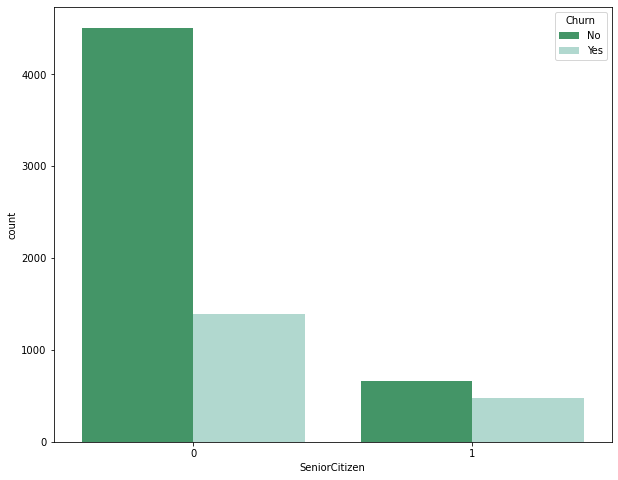

In [21]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='SeniorCitizen',palette='BuGn_r',hue='Churn')
df['SeniorCitizen'].value_counts()

SENIOR CITIZENS ARE THE LOYAL CUSTOMERS MOSTLY AS THEY DONT LIKE CHANGES AND REMAINS WITH THE COMPANY.

VERY FEW CHURN RATE.



No     3641
Yes    3402
Name: Partner, dtype: int64

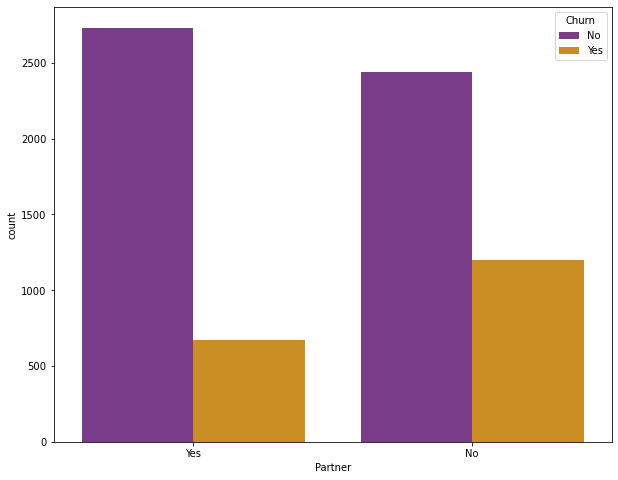

In [22]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='Partner',palette='CMRmap',hue='Churn')

df['Partner'].value_counts()

CUSTOMERS WITH NO PARTNER ARE HAVING HIGH CHURN RATE.

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

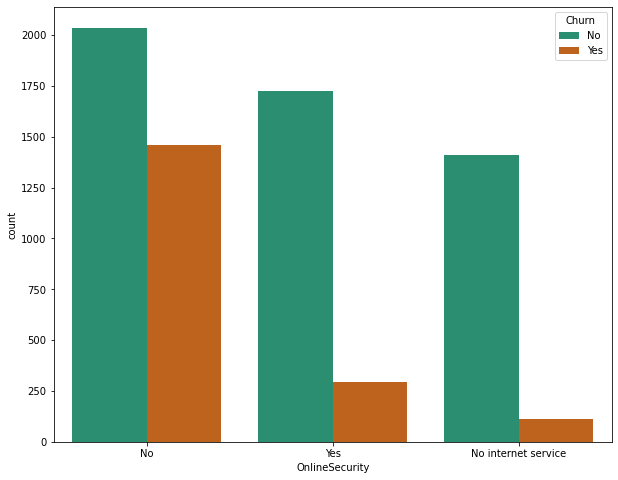

In [23]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='OnlineSecurity',palette='Dark2',hue='Churn')
df['OnlineSecurity'].value_counts()

WITH NO ONLINE SECURITY CUSTOMERS ARE LIKELY TO MOVE TO OTHER COMPANIES PROVIDING MORE OPTIONS AND FEATURES



No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

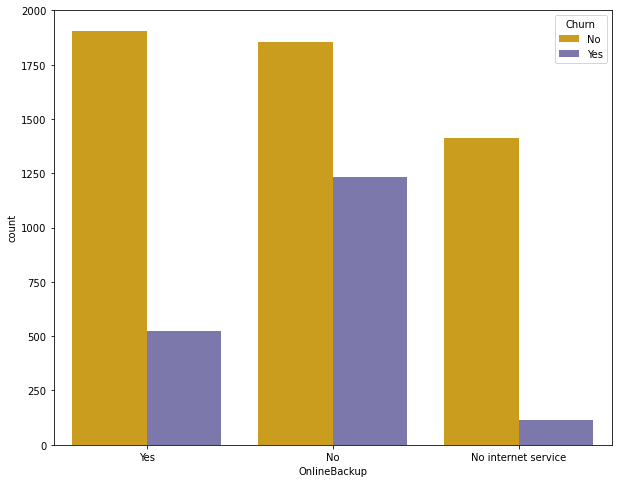

In [24]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='OnlineBackup',palette='Dark2_r',hue='Churn')
df['OnlineBackup'].value_counts()

SAME AS ONLINE SECURITY ,ONLINE BACKUP FEATURES IS ALSO IMPORTANT FOR CUSTOMERS

AS MORE FEATURES LESS CHURNING RATE

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

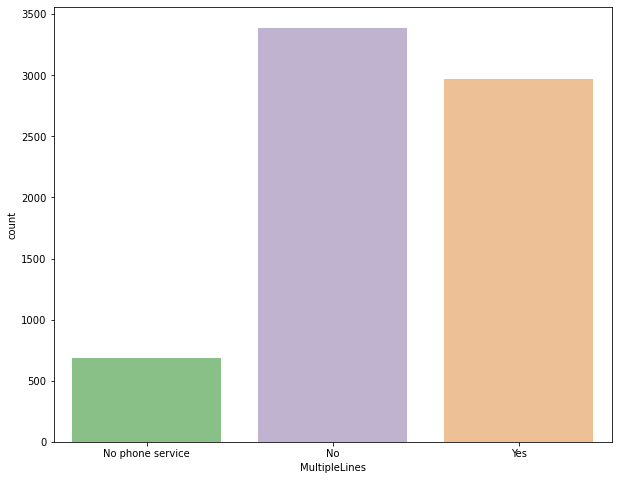

In [25]:
plt.figure(figsize=(10,8))
sns.countplot(df['MultipleLines'],palette='Accent')
df['MultipleLines'].value_counts()

NO HAS THE MAJORITY COUNT AS MULTIPLE LINES NOT PRESENT

FEW DONT HAVE PHONE SERVICE



Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

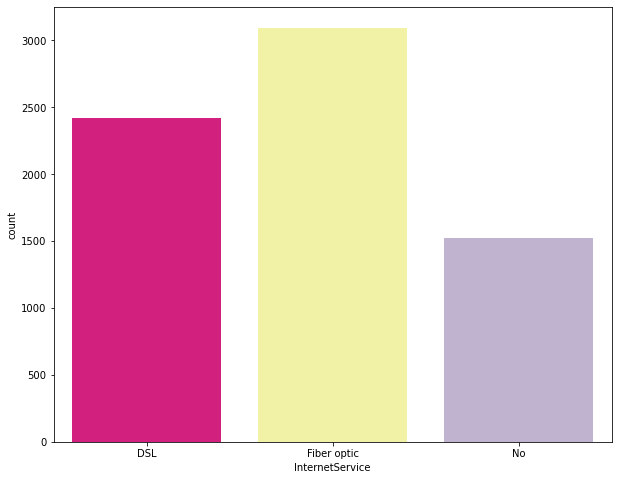

In [26]:
plt.figure(figsize=(10,8))
sns.countplot(df['InternetService'],palette='Accent_r')
df['InternetService'].value_counts()

Fiber optic internet service are in majority

Yes    6361
No      682
Name: PhoneService, dtype: int64

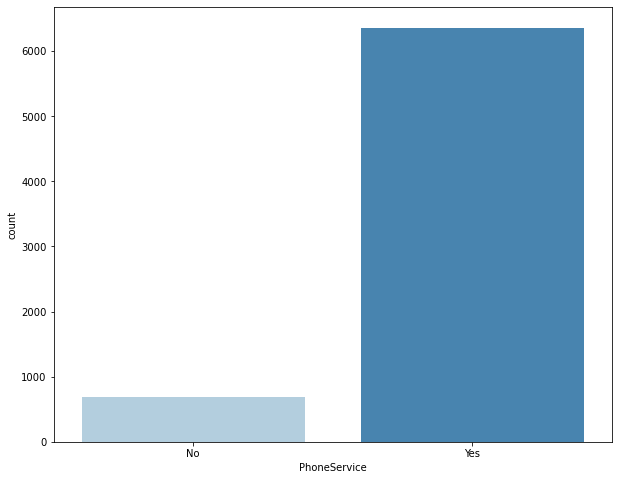

In [27]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='PhoneService',palette='Blues')
df['PhoneService'].value_counts()

MAJORITY OF PEOPLE TAKES PHONE SERVICE

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

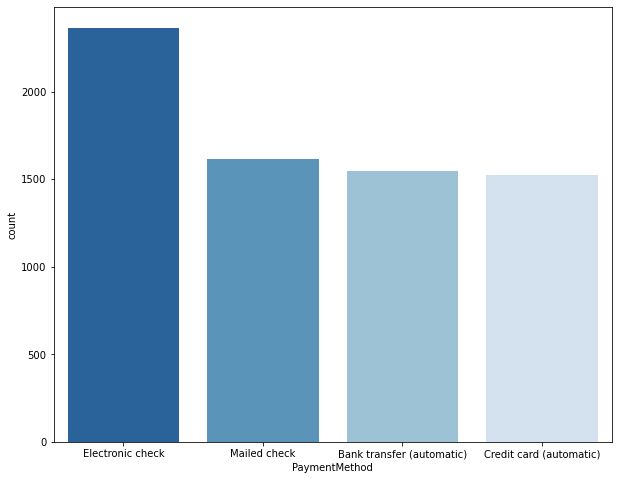

In [28]:
plt.figure(figsize=(10,8))
sns.countplot(df['PaymentMethod'],palette='Blues_r')
df['PaymentMethod'].value_counts()

PAYMENT METHOD IS MAINLY DONE BY ELECTRONIC CHECK AND REST ARE HAVING THE SAME COUNT

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

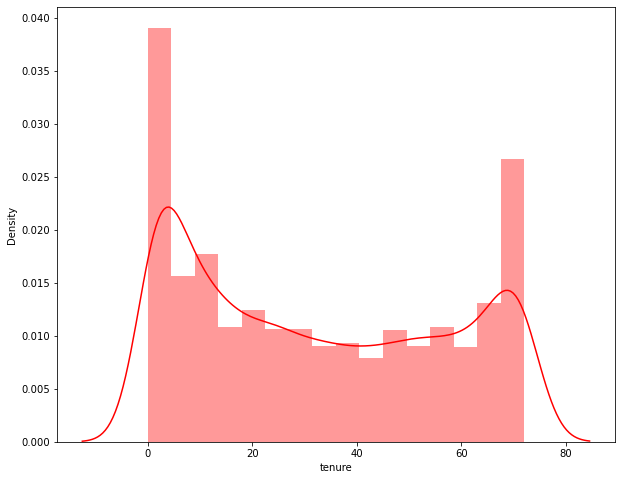

In [29]:
plt.figure(figsize=(10,8))
sns.distplot(df['tenure'],color='r')


df['tenure'].value_counts()

DENSITY OF TENURE IS HIGH EITHER FOR 1,2 MONTHS OR FOR TWO YEAR AND SO

No     5174
Yes    1869
Name: Churn, dtype: int64

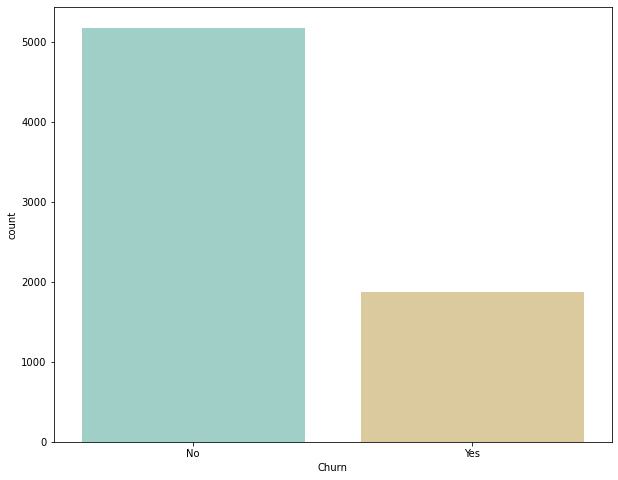

In [30]:
plt.figure(figsize=(10,8))
sns.countplot(df['Churn'],palette='BrBG_r')
df['Churn'].value_counts()

FEW CUSTOMERS ARE CHURNED

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

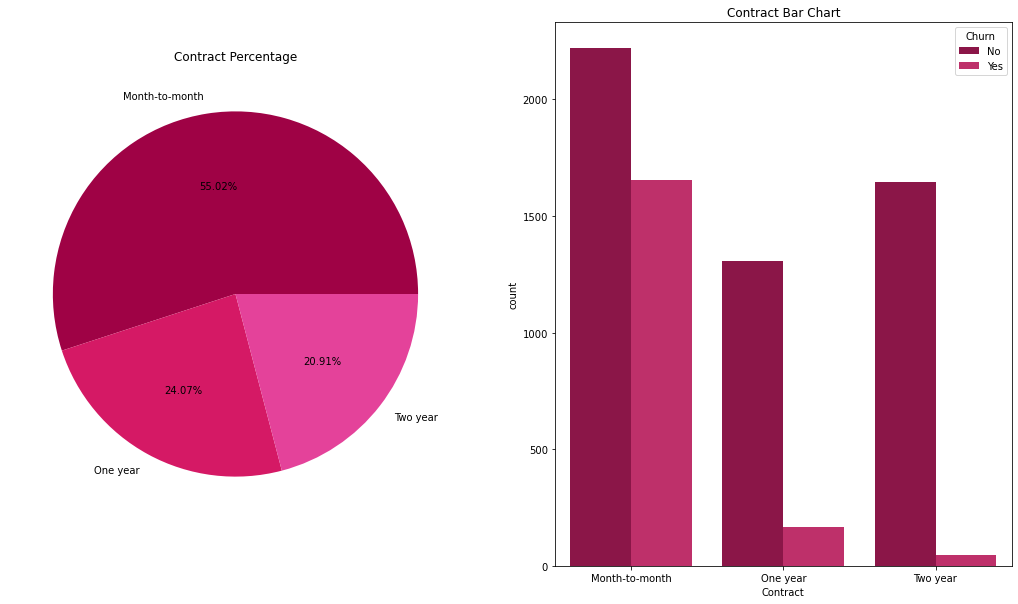

In [31]:
colors=sns.color_palette('PuRd_r')
labels=df['Contract'].dropna().unique()

plt.figure(figsize=(18,10))

plt.subplot(1,2,1)
plt.title('Contract Percentage')
plt.pie(df['Contract'].value_counts(), 
        labels=labels, 
        colors=colors, 
        autopct='%.2f%%')

plt.subplot(1,2,2)
plt.title('Contract Bar Chart')
sns.countplot(x="Contract", data=df, palette=colors,hue='Churn')

df.Contract.value_counts(dropna=False)

MAJORITY OF CUSTOMERS TAKE MONTHLY CONTRACTS.

CHURN POSSIBILITY IS ALSO HIGH FOR MONTHLY CONTRACTS THAN ONE YEAR OR TWO YEAR CONTRACTS.

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

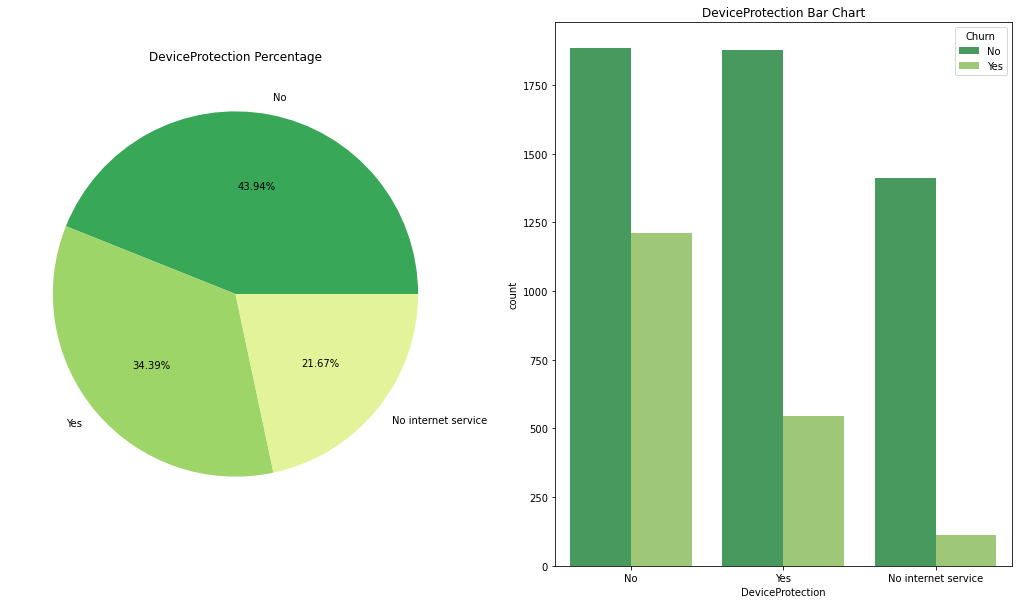

In [32]:
colors=sns.color_palette('RdYlGn_r')
labels=df['DeviceProtection'].dropna().unique()

plt.figure(figsize=(18,10))

plt.subplot(1,2,1)
plt.title('DeviceProtection Percentage')
plt.pie(df['DeviceProtection'].value_counts(), 
        labels=labels, 
        colors=colors, 
        autopct='%.2f%%')

plt.subplot(1,2,2)
plt.title('DeviceProtection Bar Chart')
sns.countplot(x="DeviceProtection", data=df, palette=colors,hue='Churn')

df.DeviceProtection.value_counts(dropna=False)


NO COVERS AROUND 44% OF DATA HAVING NO DEVICE PROTECTION THROUGH WHICH CHURNING IS MORE

MORE FACITLITIES LEAD TO LESS NO. OF CUSTOMER CHURN

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

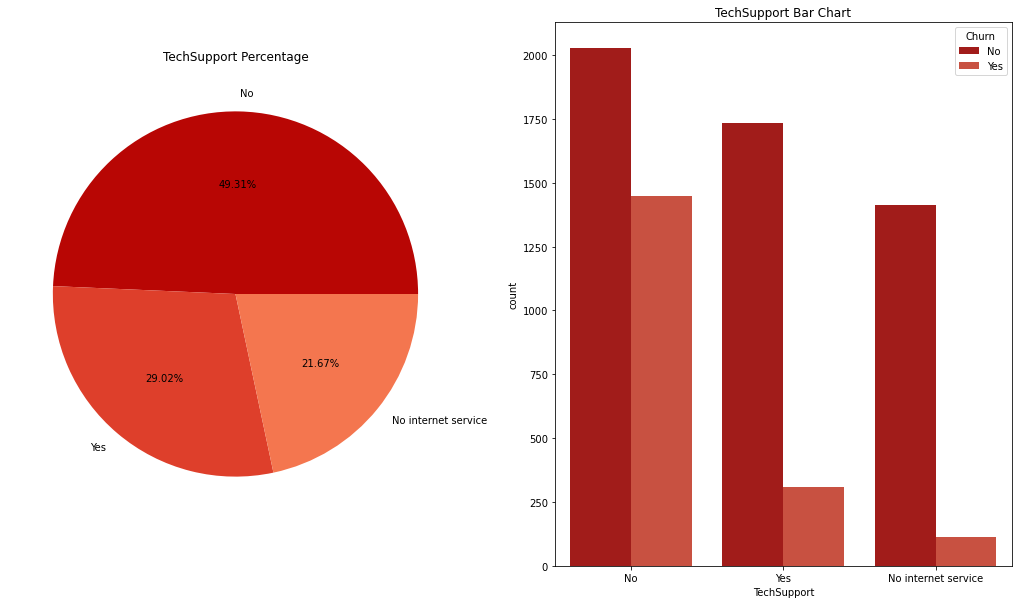

In [33]:
colors=sns.color_palette('OrRd_r')
labels=df['TechSupport'].dropna().unique()

plt.figure(figsize=(18,10))

plt.subplot(1,2,1)
plt.title('TechSupport Percentage')
plt.pie(df['TechSupport'].value_counts(), 
        labels=labels, 
        colors=colors, 
        autopct='%.2f%%')

plt.subplot(1,2,2)
plt.title('TechSupport Bar Chart')
sns.countplot(x="TechSupport", data=df, palette=colors,hue='Churn')

df.TechSupport.value_counts(dropna=False)

TECH SUPPORT IS HAVING ALMOST SAME STATS AS DEVICE PROTECTION

AS NO IS HIGH AND YES IS LOW BUT NO INTERNET SERVICE REMAINS SAME

WE WILL CORRELATE AND SEE LATER

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

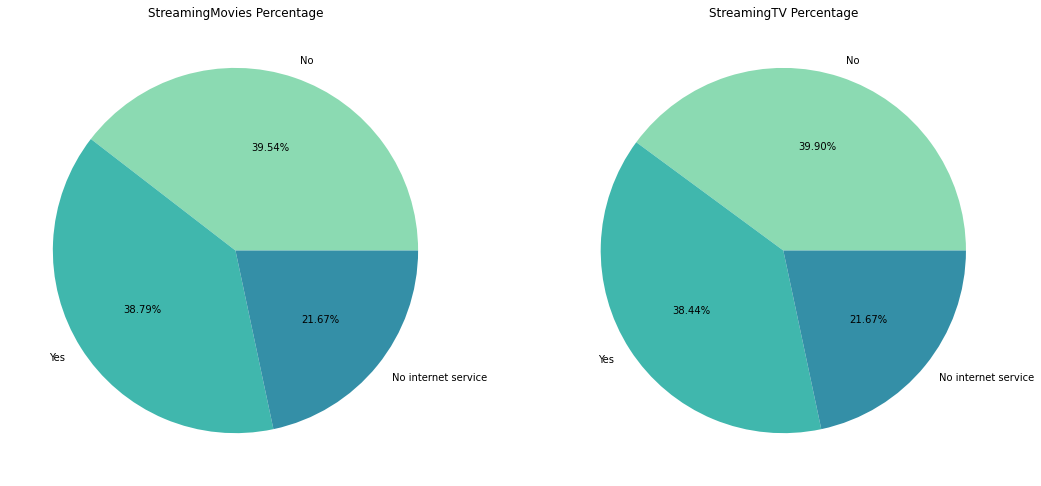

In [34]:
colors=sns.color_palette('mako_r')
labels=df['StreamingMovies'].dropna().unique()

plt.figure(figsize=(18,10))

plt.subplot(1,2,1)
plt.title('StreamingMovies Percentage')
plt.pie(df['StreamingMovies'].value_counts(), 
        labels=labels, 
        colors=colors, 
        autopct='%.2f%%')

colors1=sns.color_palette('mako_r')
labels1=df['StreamingTV'].dropna().unique()

plt.subplot(1,2,2)
plt.title('StreamingTV Percentage')
plt.pie(df['StreamingTV'].value_counts(), 
        labels=labels1, 
        colors=colors1, 
        autopct='%.2f%%')


df.StreamingMovies.value_counts(dropna=False)
df.StreamingTV.value_counts(dropna=False)

Streaming Movies and Streaming Tv are having almost same data hence creating duplicacy in dataframe so dropping streaming movies instead.



20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1585, dtype: int64

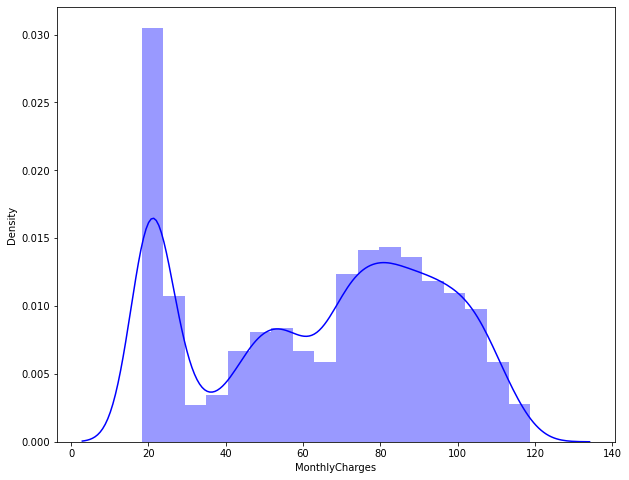

In [35]:
plt.figure(figsize=(10,8))
sns.distplot(df['MonthlyCharges'],color='b')
df['MonthlyCharges'].value_counts()

# Label Encoding

In [36]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

object=['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']


for i in object:
    df[i] = LE.fit_transform(df[i])
    
df.head()   

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [37]:
df.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,...,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,...,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.000258,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1400.550000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


MOST COLUMNS ARE NORMALLY DISTRIBUTED AND SOME AREE HAVING SKEWNESS AS SEEN FROM DIFFERENT MEAN MEDIAN AND MODE

STD IS ALSO HIGH FOR TOTAL CHARGES.

# CORRELATION

In [38]:
df.corr()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006288,-0.002074,-0.026729,-0.012823,0.008035,-0.006483,0.004316,-0.012407,0.013292,...,-0.006918,0.001140,-0.007777,-0.016746,0.015028,-0.001945,0.011604,-0.003916,-0.000270,-0.017447
gender,0.006288,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,...,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.002074,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,...,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102395,0.150889
Partner,-0.026729,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,...,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318812,-0.150448
Dependents,-0.012823,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,...,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064535,-0.164221
tenure,0.008035,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,...,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.824757,-0.352229
PhoneService,-0.006483,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,...,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.112851,0.011942
MultipleLines,0.004316,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,...,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452883,0.038037
InternetService,-0.012407,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,...,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175429,-0.047291
OnlineSecurity,0.013292,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,...,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254308,-0.289309


<AxesSubplot:>

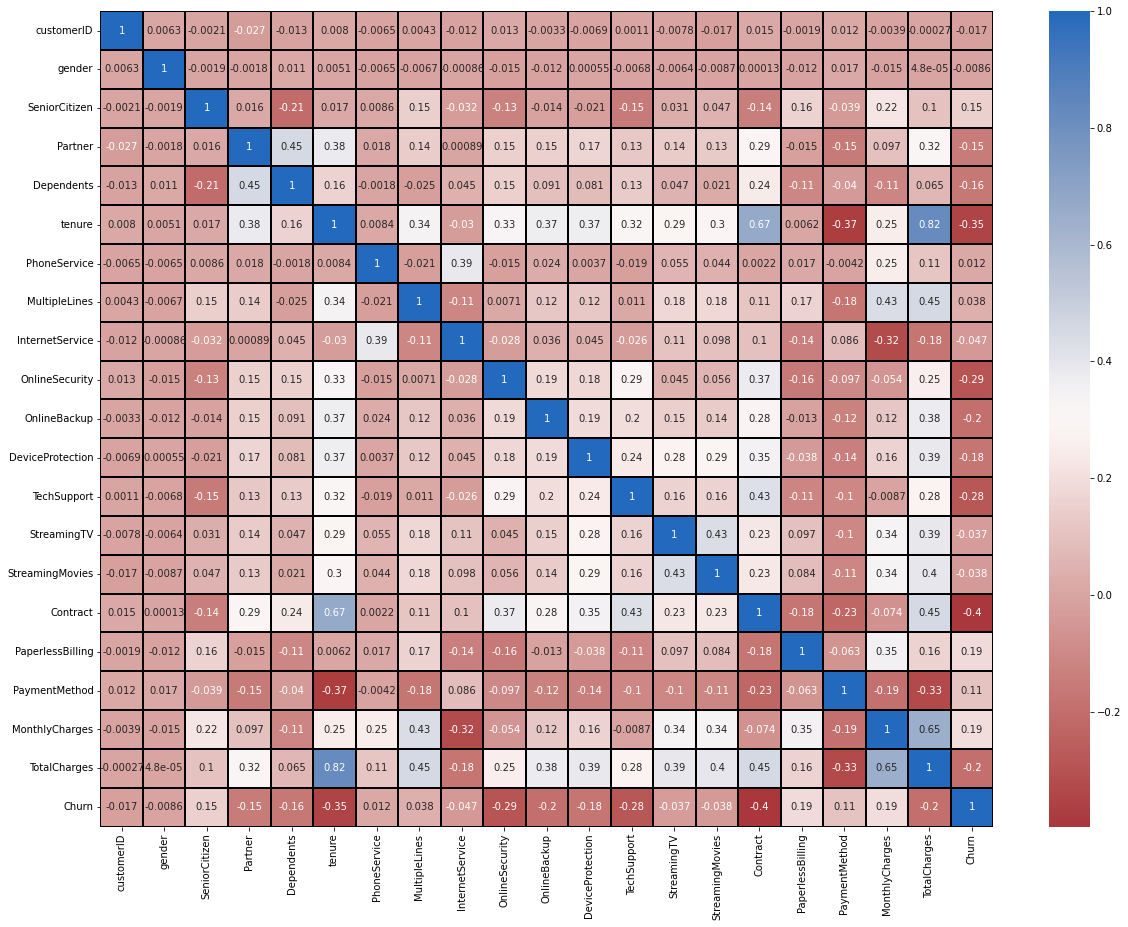

In [39]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),cmap='vlag_r',annot=True,linecolor='black',linewidths=0.02)

FROM GRAPH WE CAN SEE THAT THEIR ARE NORMAL CORRELATION BETWEEN SOME COLUMNS, HENCE DROPPING THEM TO AVOID DUPLICACY

STREAMING TV AND STREAMING MOVIES ARE HAVING NEUTRAL CORRELATION

DEVICE PROTECTION AND TECH SUPPORT ARE HAVING NEUTRAL CORRELATION

ONLINE SECURITY AND ONLINE BACKUP ARE ALSO HAVING ALMOST SAME VALUES

PHONE SERVICE DONT HAVE ANY IMPACT ON ANY

CUSTOMER ID, GENDER ,PARTNER DONT HAVE MUCH IMPACT,HENCE DROPPING IT

In [40]:
DROP=['StreamingMovies','DeviceProtection','customerID','gender','Partner', 'OnlineBackup']

for i in DROP: df.drop([i],inplace=True,axis=1)

df.head()

,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,TechSupport,StreamingTV,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,0,0,34,1,0,0,2,0,0,1,0,3,56.95,1889.50,0
2,0,0,2,1,0,0,2,0,0,0,1,3,53.85,108.15,1
3,0,0,45,0,1,0,2,2,0,1,0,0,42.30,1840.75,0
4,0,0,2,1,0,1,0,0,0,0,1,2,70.70,151.65,1


# CHECKING OUTLIERS

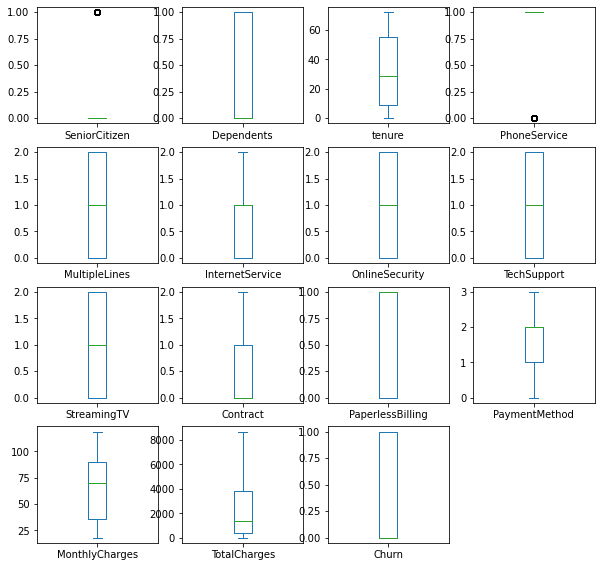

In [41]:
df.plot(kind='box',subplots=True,layout=(6,4),figsize=(10,15))
plt.show()

NO OUTLIERS present , very few is seen in phone service ,senior citizen as they are categorical so neglect them

Separating Dataset

In [42]:
#independent column
x=df.drop(['Churn'],axis=1)
#target
y=df['Churn']

In [43]:
x.shape

(7043, 14)

In [44]:
y.shape

(7043,)

# Skewness check

In [45]:
df.skew()

SeniorCitizen       1.833633
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
TechSupport         0.402365
StreamingTV         0.028486
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

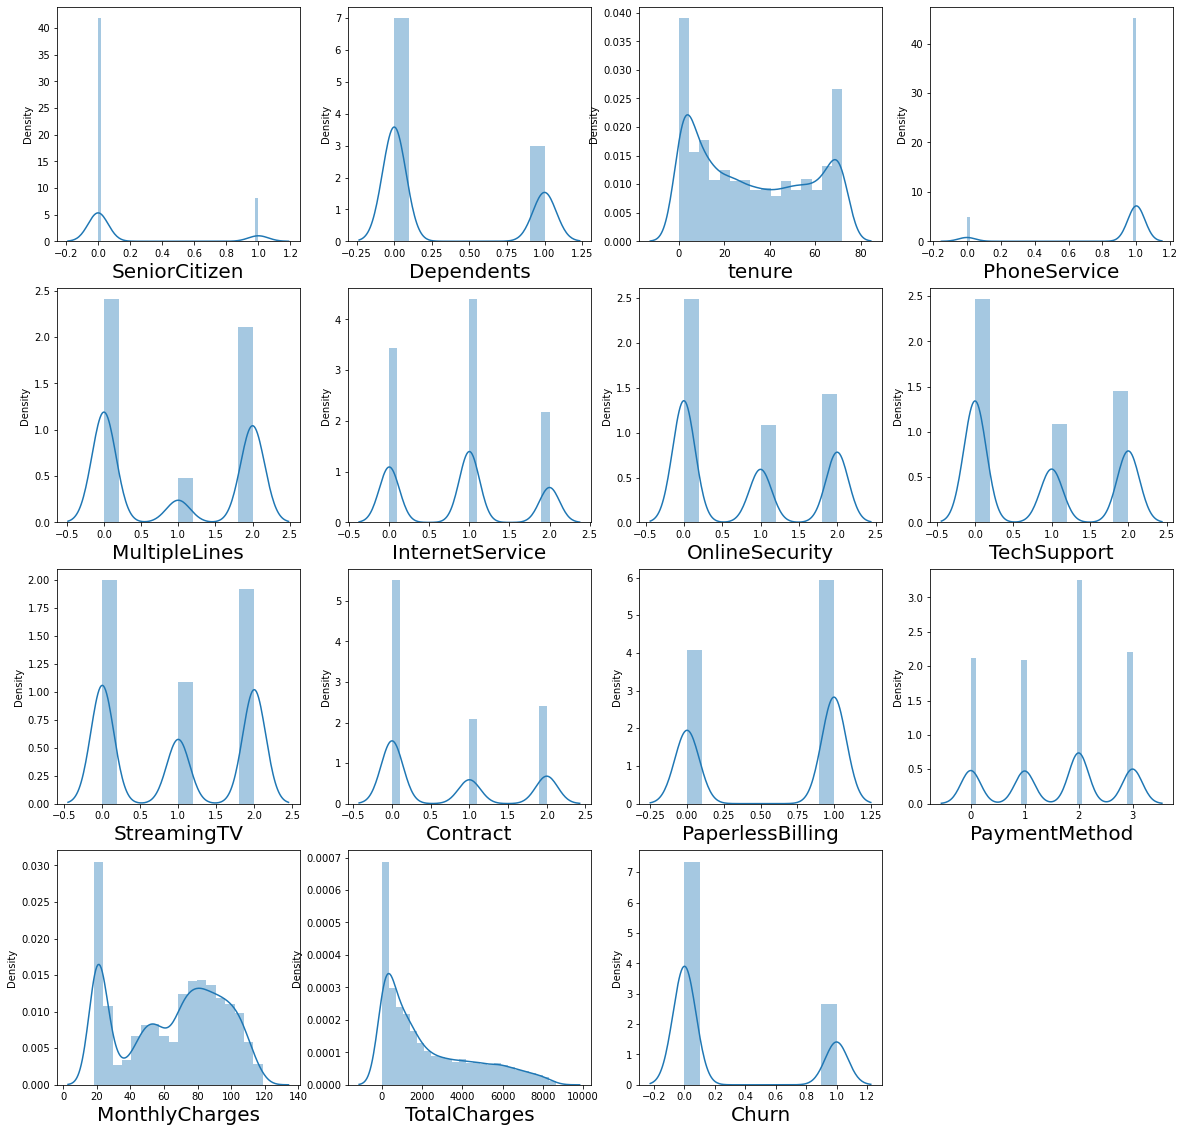

In [46]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df.columns:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

SKEWNESS PRESENT IN TOTAL CHARGES and MONTHLY CHARGES

HENCE REMOVING IT

In [47]:
from sklearn.preprocessing import power_transform
df['MonthlyCharges']=power_transform(df,method='yeo-johnson')
df['TotalCharges']=power_transform(df,method='yeo-johnson')
df.head()

,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,TechSupport,StreamingTV,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,0,1,2,-0.439916,-0.439916,0
1,0,0,34,1,0,0,2,0,0,1,0,3,-0.439916,-0.439916,0
2,0,0,2,1,0,0,2,0,0,0,1,3,-0.439916,-0.439916,1
3,0,0,45,0,1,0,2,2,0,1,0,0,-0.439916,-0.439916,0
4,0,0,2,1,0,1,0,0,0,0,1,2,-0.439916,-0.439916,1


<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

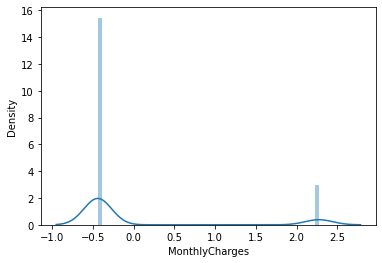

In [48]:
sns.distplot(df['MonthlyCharges'])


SKEWNESS REMOVED..

# Scaling

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,TechSupport,StreamingTV,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-0.439916,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,-0.925262,-1.113495,-0.828207,0.829798,0.398558,-1.160323,-0.994971
1,-0.439916,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-0.925262,-1.113495,0.371271,-1.205113,1.334863,-0.259629,-0.173876
2,-0.439916,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,-0.925262,-1.113495,-0.828207,0.829798,1.334863,-0.362660,-0.960399
3,-0.439916,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,1.396299,-1.113495,0.371271,-1.205113,-1.474052,-0.746535,-0.195400
4,-0.439916,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-0.925262,-1.113495,-0.828207,0.829798,0.398558,0.197365,-0.941193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.439916,1.529024,-0.340876,0.327438,1.117034,-1.183234,1.407321,1.396299,1.146547,0.371271,0.829798,1.334863,0.665992,-0.129281
7039,-0.439916,1.529024,1.613701,0.327438,1.117034,0.172250,-0.918838,-0.925262,1.146547,0.371271,0.829798,-0.537747,1.277533,2.242808
7040,-0.439916,1.529024,-0.870241,-3.054010,0.062723,-1.183234,1.407321,-0.925262,-1.113495,-0.828207,0.829798,0.398558,-1.168632,-0.855182
7041,2.273159,-0.654012,-1.155283,0.327438,1.117034,0.172250,-0.918838,-0.925262,-1.113495,-0.828207,0.829798,1.334863,0.320338,-0.872777


# SMOTE FOR BALANCING DATA

In [51]:
#SMOTE(synthetic Minority over sampling technique)
#It's use for Balancing the dataset

from imblearn.over_sampling import SMOTE
sm=SMOTE()

x_train,y_train=sm.fit_resample(x,y)
y_train


0        0
1        0
2        1
3        0
4        1
        ..
10343    1
10344    1
10345    1
10346    1
10347    1
Name: Churn, Length: 10348, dtype: int32

In [52]:
y_train.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

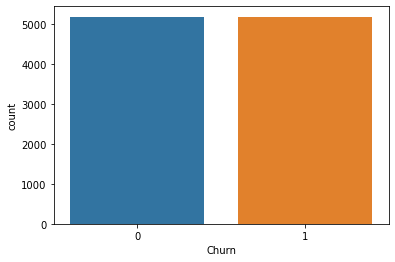

In [53]:
sns.countplot(y_train)

as the target column was bias so by oversampling method data is now balanced,can move forward for model training.

In [54]:
# importing all the required libraries of models
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')


In [55]:
# creating instances of models
models = [('lo',LogisticRegression()),('rfc',RandomForestClassifier()),('ETC',ExtraTreesClassifier()),
         ('bc',BaggingClassifier()),('dtc',DecisionTreeClassifier()),('knc',KNeighborsClassifier()),
          ('gbc',GradientBoostingClassifier())]

In [56]:
#function to return best score of individual models
def model_selection(md,model):
    best_score=0
    for i in range(201):
        from sklearn.model_selection import train_test_split
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.22, random_state = i)
        
        md = model
        md.fit(x_train,y_train)
        b_score=md.score(x_test,y_test)
        pred_md = md.predict(x_test)
        b_score
        if b_score>best_score:
            best_score=b_score
            random_state=i
    print("Best Score for model ",model," is = {} For Random state = {}".format(best_score*100,random_state))
    

In [57]:
for i,j in models:
    model_selection(i,j)

Best Score for model  LogisticRegression()  is = 82.58064516129032 For Random state = 35
Best Score for model  RandomForestClassifier()  is = 80.58064516129032 For Random state = 98
Best Score for model  ExtraTreesClassifier()  is = 79.80645161290323 For Random state = 98
Best Score for model  BaggingClassifier()  is = 80.90322580645162 For Random state = 106
Best Score for model  DecisionTreeClassifier()  is = 76.64516129032258 For Random state = 122
Best Score for model  KNeighborsClassifier()  is = 79.54838709677419 For Random state = 98
Best Score for model  GradientBoostingClassifier()  is = 82.45161290322581 For Random state = 35


# Splitting the DataFrame and Model selection

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=129)

# 1)LOGISTIC REGRESSION

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

lo=LogisticRegression()
lo.fit(x_train,y_train)
lo.score(x_train,y_train)
predlo=lo.predict(x_test)


print('Accuracy Score is''\n',accuracy_score(y_test,predlo))
print('Confusion Matrix''\n',confusion_matrix(y_test,predlo))
print(classification_report(y_test,predlo))


Accuracy Score is
 0.82
Confusion Matrix
 [[1052  102]
 [ 177  219]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1154
           1       0.68      0.55      0.61       396

    accuracy                           0.82      1550
   macro avg       0.77      0.73      0.75      1550
weighted avg       0.81      0.82      0.81      1550



CROSS VALIDATION

In [60]:
test_accuracy= accuracy_score(y_test,predlo)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(lo,x,y,cv=i,n_jobs=2)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 80.32086946157887 and Accuracy score is 82.0
At cross fold 3 the Cross Val score is 80.16477231073195 and Accuracy score is 82.0
At cross fold 4 the Cross Val score is 80.23582287956224 and Accuracy score is 82.0
At cross fold 5 the Cross Val score is 80.19322819214143 and Accuracy score is 82.0
At cross fold 6 the Cross Val score is 80.12223011318939 and Accuracy score is 82.0
At cross fold 7 the Cross Val score is 80.22153643608628 and Accuracy score is 82.0
At cross fold 8 the Cross Val score is 80.2074089361263 and Accuracy score is 82.0
At cross fold 9 the Cross Val score is 80.33534068114817 and Accuracy score is 82.0


# 2) DecisionTreeClassifier

In [61]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_dt=dt.predict(x_test)
print('Accuracy score''\n',accuracy_score(y_test,pred_dt))
print('Confusion Matrix''\n',confusion_matrix(y_test,pred_dt))
print('Classification Report''\n',classification_report(y_test,pred_dt))

Accuracy score
 0.747741935483871
Confusion Matrix
 [[947 207]
 [184 212]]
Classification Report
               precision    recall  f1-score   support

           0       0.84      0.82      0.83      1154
           1       0.51      0.54      0.52       396

    accuracy                           0.75      1550
   macro avg       0.67      0.68      0.67      1550
weighted avg       0.75      0.75      0.75      1550



CROSS VALIDATION

In [62]:
test_accuracy= accuracy_score(y_test,pred_dt)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(dt,x,y,cv=i)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 72.79574358827968 and Accuracy score is 74.7741935483871
At cross fold 3 the Cross Val score is 73.00863983090524 and Accuracy score is 74.7741935483871
At cross fold 4 the Cross Val score is 73.15067465541273 and Accuracy score is 74.7741935483871
At cross fold 5 the Cross Val score is 73.07953335699078 and Accuracy score is 74.7741935483871
At cross fold 6 the Cross Val score is 72.98010604878941 and Accuracy score is 74.7741935483871
At cross fold 7 the Cross Val score is 72.36972546900466 and Accuracy score is 74.7741935483871
At cross fold 8 the Cross Val score is 72.83845836343 and Accuracy score is 74.7741935483871
At cross fold 9 the Cross Val score is 72.83809075854231 and Accuracy score is 74.7741935483871


# 3) RandomForestClassifier

In [63]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_rfc=rfc.predict(x_test)
print('Accuracy score''\n',accuracy_score(y_test,pred_rfc))
print('Confusion Matrix''\n',confusion_matrix(y_test,pred_rfc))
print('Classification Report''\n',classification_report(y_test,pred_rfc))

Accuracy score
 0.8090322580645162
Confusion Matrix
 [[1049  105]
 [ 191  205]]
Classification Report
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1154
           1       0.66      0.52      0.58       396

    accuracy                           0.81      1550
   macro avg       0.75      0.71      0.73      1550
weighted avg       0.80      0.81      0.80      1550



CROSS VALIDATION

In [64]:
test_accuracy= accuracy_score(y_test,pred_rfc)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(rfc,x,y,cv=i,n_jobs=2)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 78.38983378870124 and Accuracy score is 80.90322580645162
At cross fold 3 the Cross Val score is 78.50347574815507 and Accuracy score is 80.90322580645162
At cross fold 4 the Cross Val score is 78.51777463734449 and Accuracy score is 80.90322580645162
At cross fold 5 the Cross Val score is 78.36158784437706 and Accuracy score is 80.90322580645162
At cross fold 6 the Cross Val score is 78.78748269917551 and Accuracy score is 80.90322580645162
At cross fold 7 the Cross Val score is 78.71631045053272 and Accuracy score is 80.90322580645162
At cross fold 8 the Cross Val score is 78.57435378185946 and Accuracy score is 80.90322580645162
At cross fold 9 the Cross Val score is 78.6741161009909 and Accuracy score is 80.90322580645162


# 4) GradientBoostingClassifier

In [65]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
pred_gbk = gbk.predict(x_test)
print('Accuracy score''\n',accuracy_score(pred_gbk,y_test))
print('Confusion Matrix''\n',confusion_matrix(y_test,pred_gbk))
print('Classification Report''\n',classification_report(y_test,pred_gbk))

Accuracy score
 0.82
Confusion Matrix
 [[1055   99]
 [ 180  216]]
Classification Report
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1154
           1       0.69      0.55      0.61       396

    accuracy                           0.82      1550
   macro avg       0.77      0.73      0.75      1550
weighted avg       0.81      0.82      0.81      1550



CROSS VALIDATION

In [66]:
test_accuracy= accuracy_score(y_test,pred_gbk)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(gbk,x,y,cv=i,n_jobs=2)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 80.0369358441708 and Accuracy score is 82.0
At cross fold 3 the Cross Val score is 80.44865350597995 and Accuracy score is 82.0
At cross fold 4 the Cross Val score is 80.34933018429611 and Accuracy score is 82.0
At cross fold 5 the Cross Val score is 80.47712755661655 and Accuracy score is 82.0
At cross fold 6 the Cross Val score is 80.39201163022057 and Accuracy score is 82.0
At cross fold 7 the Cross Val score is 80.53380666490489 and Accuracy score is 82.0
At cross fold 8 the Cross Val score is 80.5763562841812 and Accuracy score is 82.0
At cross fold 9 the Cross Val score is 80.81788807847347 and Accuracy score is 82.0


ALL THE MODEL PERFORMING WELL AND FIT GOOD BUT RANDOM FOREST AND GRADIENTBOOSTING CLASSIFIER ARE BEST IN THEM.

# Hyper Parameter Tuning for best model

In [67]:
#ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

#creating the parameter list to pass in GrideSearchcv
parameters={'max_features':['auto','sqrt','log2'],
           'max_depth':[4,5,6,7,8,9,10]}

gcv=GridSearchCV(GradientBoostingClassifier(),parameters,cv=5,scoring="accuracy")
gcv.fit(x_train,y_train)
gcv.best_params_

{'max_depth': 5, 'max_features': 'sqrt'}

In [68]:
gcv_pred=gcv.best_estimator_.predict(x_test)#predicting with best parameters
accuracy_score(y_test,gcv_pred)#checking the final score

print('Accuracy score''\n',accuracy_score(y_test,gcv_pred))
print('Confusion Matrix''\n',confusion_matrix(y_test,gcv_pred))
print('Classification Report''\n',classification_report(y_test,gcv_pred))


Accuracy score
 0.8193548387096774
Confusion Matrix
 [[1050  104]
 [ 176  220]]
Classification Report
               precision    recall  f1-score   support

           0       0.86      0.91      0.88      1154
           1       0.68      0.56      0.61       396

    accuracy                           0.82      1550
   macro avg       0.77      0.73      0.75      1550
weighted avg       0.81      0.82      0.81      1550



In [69]:
# RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#creating the parameter list to pass in GrideSearchcv
parameters1={'max_features':['auto','sqrt','log2'],
           'max_depth':[4,5,6,7,8,9,10],
           'criterion':['gini','entropy']}

gcv1=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
gcv1.fit(x_train,y_train)
gcv1.best_params_

{'max_depth': 6, 'max_features': 'log2'}

In [70]:
gcv_pred1=gcv1.best_estimator_.predict(x_test)#predicting with best parameters
accuracy_score(y_test,gcv_pred1)#checking the final score

print('Accuracy score''\n',accuracy_score(y_test,gcv_pred1))
print('Confusion Matrix''\n',confusion_matrix(y_test,gcv_pred1))
print('Classification Report''\n',classification_report(y_test,gcv_pred1))

Accuracy score
 0.8187096774193549
Confusion Matrix
 [[1068   86]
 [ 195  201]]
Classification Report
               precision    recall  f1-score   support

           0       0.85      0.93      0.88      1154
           1       0.70      0.51      0.59       396

    accuracy                           0.82      1550
   macro avg       0.77      0.72      0.74      1550
weighted avg       0.81      0.82      0.81      1550



randomforest ,gradientboosting and logistic regression are doing good out of which GradientBoostingClassifier is showing highest accuracy

# ROC AUC plot for best model

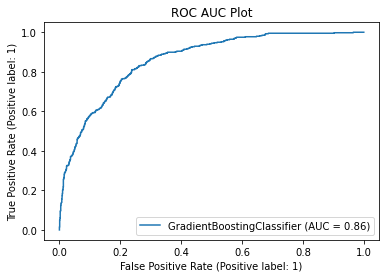

In [71]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(gcv.best_estimator_,x_test,y_test)
plt.title("ROC AUC Plot")
plt.show()

# Saving the best Model

In [72]:
# save the model to disk
import pickle

filename = 'Customer_churn.pkl'
pickle.dump(gcv.best_estimator_, open(filename, 'wb'))

In [73]:
# load the model from disk

loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test,y_test)
print(result)

0.8193548387096774


# Final Prediction Submission

In [75]:
import numpy as np
a = np.array(y_test)
predicted = np.array(loaded_model.predict(x_test))
df = pd.DataFrame(zip(a,predicted), columns = ["Original","Predicted"])
df

,Original,Predicted
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
...,...,...
1545,0,0
1546,0,0
1547,0,0
1548,0,1
